# <font color='Blue'>Machine Learning - Ensemble Methods</font>

All models discussed so fare predict the value of the outcome variable based on a single model. Ensemble methods, on the 
other hand, are learning algorithms that take a set of estimators or classifiers (models) and classify new data points using
strategy such as majority vote. The majority voting could be based on couning simply the vote for each class or could be 
weighted based on their individual accuracy measures. Ensemble methods can also be used for regression, where the prediction     of new data is simple average or weighted average of all the predictions from the set of regression models.There are two 
types of ensemble methods
  
### <font color='Blue'>Bagging</font>

Bagging is a colloquial term for bootstrap aggregation. Bootstrap aggregation is a method that allows us to decrease the 
variance of an estimate by averaging multiple estimates that are measured from random subsamples of a population. It may  
also involve feature bagging. 
  
### <font color='Blue'>Boosting</font>

In machine learning, boosting is an ensemble meta-algorithm for primarily reducing bias, and also variance in supervised 
learning, and a family of machine learning algorithms that convert weak learners to strong ones. Boosting is based on the 
question posed by Kearns and Valiant (1988, 1989): "Can a set of weak learners create a single strong learner?" A weak 
learner is defined to be a classifier that is only slightly correlated with the true classification (it can label examples 
better than random guessing). In contrast, a strong learner is a classifier that is arbitrarily well-correlated with the 
true classification. 

### <font color='Blue'>Random Forest</font>
Random forest is one of the most popular ensemble techniques used in the industry due to its performance and scalability. A 
random forest is an ensemble of decision trees, where each tree is built from a bootstrapped sample and randomly selected set 
of features (feature bagging). The hyperparameters in a Random forest are
  
  1. Number of decision trees
  2. Number of records and features to be sampled
  3. Depth and search criteria# 

## <font color='Blue'>Importing Libraries</font>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
# RoC Curve

# RoC Curve can be used to understand the overall performance of a logistic regression model and used for model selection
# RoC Curve is a plot between False positive rate [FP / (TN + FP)] and True positive rate [TP / (TP+FN)]
# Higher the AUC, better the model
# AUC < 0.5 model is inferior to a case of having no model
# AUC > 0.7 model is useful

def draw_roc( actual, probs ):
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve( actual,
    probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

#fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob)
#auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob )

## <font color='Blue'>1.0 Random Forest</font>

## <font color='Blue'>1.1 Loading Data</font>

In [4]:
bank_df = pd.read_csv( 'bank.csv')
bank_df.head(5)

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB


## <font color='Blue'>1.1 Segregating X and Y features</font>

In [6]:
X_features = list( bank_df.columns )

# Remove the response variable from the list
X_features.remove( 'subscribed' )
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

## <font color='Blue'>1.2 Dummy Coding Categorical Variables in X</font>

In [7]:
encoded_bank_df = pd.get_dummies( bank_df[X_features], drop_first = True )
X = encoded_bank_df
X

,age,balance,current-campaign,previous-campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing-loan_yes,personal-loan_yes
0,30,1787,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,33,4789,1,4,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1
2,35,1350,1,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
3,30,1476,4,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,1
4,59,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,5,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4517,57,-3313,1,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,1,1
4518,57,295,11,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4519,28,1137,4,3,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


## <font color='Blue'>1.3 Encoding subscribed column and assigning to Y</font>

In [8]:
Y = bank_df.subscribed.map( lambda x: int( x == 'yes') )
count = Y.value_counts() 
print(count)

0    4000
1     521
Name: subscribed, dtype: int64


## <font color='Blue'>1.4 Splitting data into test and train</font>

In [9]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split( X, Y, test_size = 0.3, random_state = 42 )
print("Actual 0's ad 1's in Test Data")
print(test_y.value_counts())

Actual 0's ad 1's in Test Data
0    1205
1     152
Name: subscribed, dtype: int64


## <font color='Blue'>1.5 Building a Random Forest Model</font>

In [10]:
## Initializing the Random Forest Classifier with max_dept and n_estimators
radm_clf = RandomForestClassifier( max_depth=10, n_estimators=10)
radm_clf.fit( train_X, train_y )

RandomForestClassifier(max_depth=10, n_estimators=10)

## <font color='Blue'>1.6 Extracting Probabilities</font>

In [11]:
rf_predict = radm_clf.predict_proba( test_X )
rf_predict = pd.DataFrame(rf_predict)[1]
rf_predict = rf_predict.to_numpy()

In [12]:
# Gathering probabilities
y_pred_df = pd.DataFrame( { "actual": test_y, 
                            "predicted_prob": rf_predict 
                          } )
y_pred_df.sample(10, random_state = 42)
y_pred_df.head(10)

,actual,predicted_prob
2398,0,0.029002
800,0,0.282706
2288,0,0.078556
2344,0,0.042619
3615,0,0.102209
3548,0,0.071075
1115,0,0.057420
4053,0,0.258484
838,0,0.103459
4141,0,0.302690


## <font color='Blue'>1.7 Classifier Performance</font>

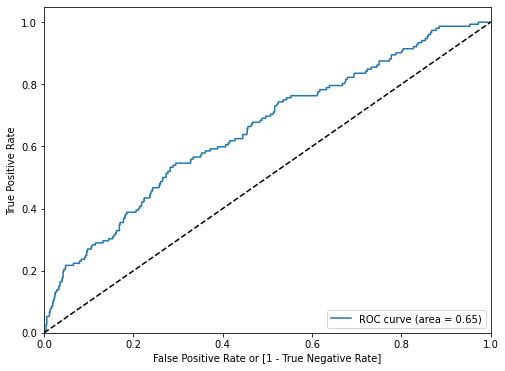

0.652740773094562

In [13]:
# Plotting AUC 
fpr, tpr, thresholds = draw_roc( test_y, y_pred_df.predicted_prob)

# Measuring Test AUC
metrics.roc_auc_score( test_y, y_pred_df.predicted_prob)

## <font color='Blue'>1.8 Plotting Distributions and Identifying optimal probability</font>

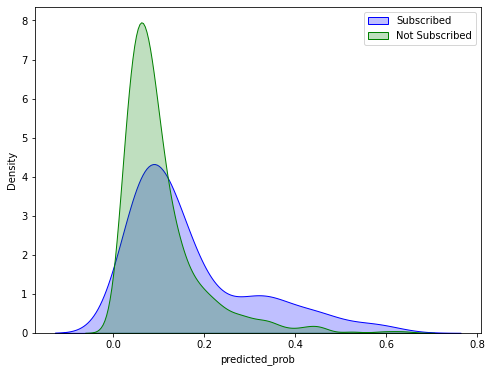

In [14]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Subscribed' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Not Subscribed' )
plt.legend()
plt.show()

## <font color='Blue'>1.9 Confusion Matrix and Peformance Measures</font></font>

In [15]:
y_pred_df['pred_y'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.15 else 0)

In [16]:
pd.crosstab(test_y, y_pred_df.pred_y,margins=True,colnames=['predicted'],rownames=['actual'],margins_name="Total")

predicted,0,1,Total
actual,,,
0,988,217,1205
1,96,56,152
Total,1084,273,1357


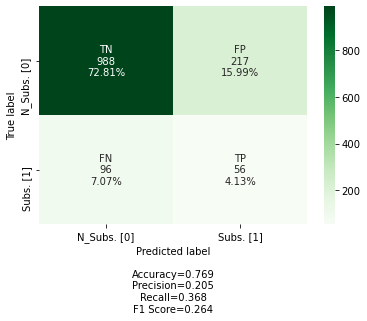

In [17]:
# Confusion matrix
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(test_y, y_pred_df.pred_y)
labels = ["TN","FP","FN","TP"]
categories = ["N_Subs. [0]","Subs. [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

In [18]:
print( metrics.classification_report( test_y, y_pred_df.pred_y ) )

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1205
           1       0.21      0.37      0.26       152

    accuracy                           0.77      1357
   macro avg       0.56      0.59      0.56      1357
weighted avg       0.83      0.77      0.80      1357



## <font color='Blue'>1.10 Finding important features</font></font>

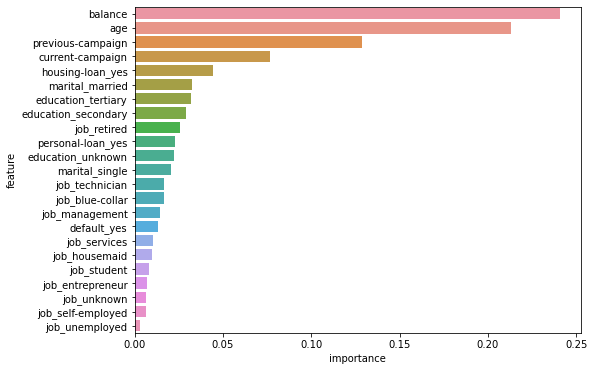

In [19]:
# Create a dataframe to store the featues and their corresponding importances
feature_rank = pd.DataFrame( { 'feature': train_X.columns, 'importance': radm_clf.feature_importances_ } )

## Sorting the features based on their importances with most important feature at top
feature_rank = feature_rank.sort_values('importance', ascending = False)
plt.figure(figsize=(8, 6))

# plot the values
sn.barplot( y = 'feature', x = 'importance', data = feature_rank );

## <font color='Blue'>2.0 Boosting</font>

Boosting is another popular ensemble technique which combines multiple weak classifiers into a single strong classifier. A weak classifier is one which is slightly better than random guessing. Any classification algoritm can be used for boosting and it is called base classifier. Boosting builds classifiers in a sequential manner as opposed as bagging, which can build classifiers in parallel. Boosting builds classifier by giving equal weights to each sample and then focuses on correctly classifying misclassified examples in subsequent classifiers. Two most widely used boosting algorithms are AdaBoost and Gradient Boosting.

## <font color='Blue'>2.1 ADABOOST</font>

Adaboost assigns weight to each records in a training set, which determines the probability that a specific records is selected for training a classifier. For the first classifier, the weights af all examples will be equal (random sampling), but after training the first classifier, Adaboost increases the weight for the misclassified records so that these records will have a higher probability of selection in the training set in anticipation that the next classifier will learn to classify them correctly.

## <font color='Blue'>2.2 Executing ADABOOST</font>

In [20]:
## Importing Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier

## Importing Logistic regression
from sklearn.linear_model import LogisticRegression

## Initializing logistic regression to use as base classifier
logreg_clf = LogisticRegression()

## Initilizing adaboost classifier with 50 classifers
ada_clf = AdaBoostClassifier(logreg_clf, n_estimators=50)

## Fitting adaboost model to training set
ada_clf.fit(train_X, train_y )

AdaBoostClassifier(base_estimator=LogisticRegression())

## <font color='Blue'>2.3 Extracting Probabilities</font>

In [21]:
ada_predict = ada_clf.predict_proba( test_X )
ada_predict = pd.DataFrame(ada_predict)[1]
ada_predict = ada_predict.to_numpy()

In [22]:
# Gathering probabilities
y_pred_df = pd.DataFrame( { "actual": test_y, 
                            "predicted_prob": ada_predict 
                          } )
y_pred_df.sample(10, random_state = 42)
y_pred_df.head(10)

,actual,predicted_prob
2398,0,0.487652
800,0,0.494990
2288,0,0.489490
2344,0,0.484103
3615,0,0.490475
3548,0,0.490174
1115,0,0.488230
4053,0,0.491627
838,0,0.490735
4141,0,0.491098


## <font color='Blue'>2.4 Classfier Performance</font>

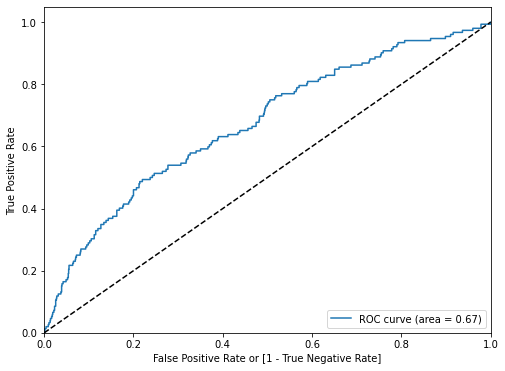

0.6714184319720462

In [23]:
# Plotting AUC 
fpr, tpr, thresholds = draw_roc( test_y, y_pred_df.predicted_prob)

# Measuring Test AUC
metrics.roc_auc_score( test_y, y_pred_df.predicted_prob)

## <font color='Blue'>2.5 Plotting Distributions and Identifying optimal probability</font>

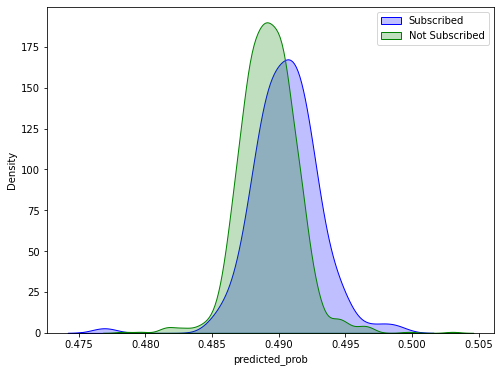

In [24]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Subscribed' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Not Subscribed' )
plt.legend()
plt.show()

## <font color='Blue'>2.6 Confusion Matrix and Performance Measure</font></font>

In [25]:
y_pred_df['pred_y'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.491 else 0)

In [26]:
pd.crosstab(test_y, y_pred_df.pred_y,margins=True,colnames=['predicted'],rownames=['actual'],margins_name="Total")

predicted,0,1,Total
actual,,,
0,991,214,1205
1,90,62,152
Total,1081,276,1357


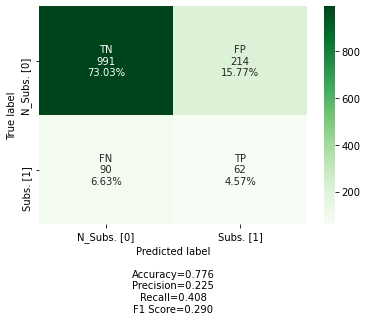

In [27]:
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(test_y, y_pred_df.pred_y)
labels = ["TN","FP","FN","TP"]
categories = ["N_Subs. [0]","Subs. [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

In [28]:
print( metrics.classification_report( test_y, y_pred_df.pred_y ) )

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1205
           1       0.22      0.41      0.29       152

    accuracy                           0.78      1357
   macro avg       0.57      0.62      0.58      1357
weighted avg       0.84      0.78      0.80      1357



## <font color='Blue'>3.0 Gradient Boosting</font></font>

AdaBoost (seen previously) focusses on the misclassified examples in the subsequent classifiers, whereas gradient boosting focusses on residuals from previous classifers and fits a models to the residuals. Gradient boosting algorithm repetitively leverages the patterns in the residuals and strengthens the model with weak predictions and makes in better. Gradient boosting uses a deicison tree as a base classifier.

## <font color='Blue'>3.1 Executing Gradient Boosting</font>

In [29]:
# Gradient Boosting
## Importing Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

## Initializing Gradient Boosting with 500 estimators and max depth as 10.
gboost_clf = GradientBoostingClassifier( n_estimators=500, max_depth=10)

## Fitting gradient boosting model to training set
gboost_clf.fit(train_X, train_y )

GradientBoostingClassifier(max_depth=10, n_estimators=500)

## <font color='Blue'>3.2 Extracting Probabilities</font>

In [30]:
gra_predict = gboost_clf.predict_proba( test_X )
gra_predict = pd.DataFrame(gra_predict)[1]
gra_predict = gra_predict.to_numpy()

In [31]:
# Gathering probabilities
y_pred_df = pd.DataFrame( { "actual": test_y, 
                            "predicted_prob": gra_predict 
                          } )
y_pred_df.sample(10, random_state = 42)
y_pred_df.head(10)

,actual,predicted_prob
2398,0,3.090449e-06
800,0,1.376329e-04
2288,0,9.470269e-06
2344,0,6.429742e-07
3615,0,7.264112e-04
3548,0,9.164056e-07
1115,0,3.007165e-03
4053,0,1.829761e-05
838,0,1.698305e-05
4141,0,8.852924e-01


## <font color='Blue'>3.3 Classifier Performance</font>

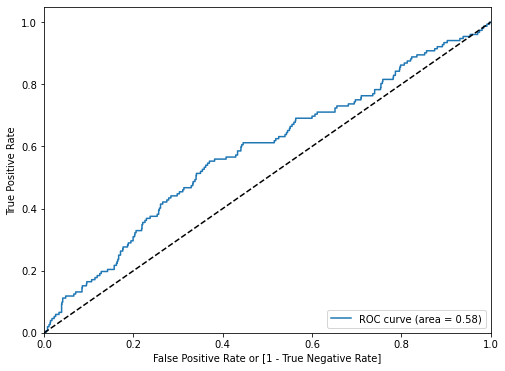

0.5834243284559948

In [32]:
# Plotting AUC 
fpr, tpr, thresholds = draw_roc( test_y, y_pred_df.predicted_prob)

# Measuring Test AUC
metrics.roc_auc_score( test_y, y_pred_df.predicted_prob)

## <font color='Blue'>3.4 Plotting Distributions and Identifying optimal probability</font>

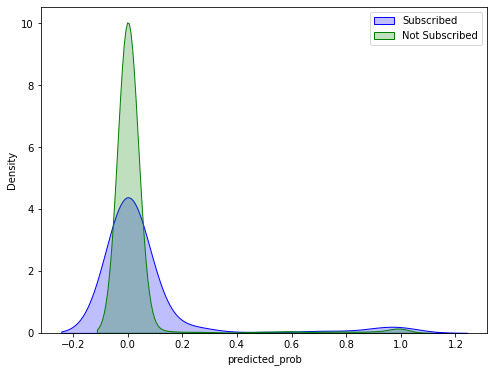

In [33]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Subscribed' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Not Subscribed' )
plt.legend()
plt.show()

## <font color='Blue'>3.5 Confusion Matrix and Performance Measures</font>

In [34]:
y_pred_df['pred_y'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.0025 else 0)

In [35]:
pd.crosstab(test_y, y_pred_df.pred_y,margins=True,colnames=['predicted'],rownames=['actual'],margins_name="Total")

predicted,0,1,Total
actual,,,
0,1068,137,1205
1,126,26,152
Total,1194,163,1357


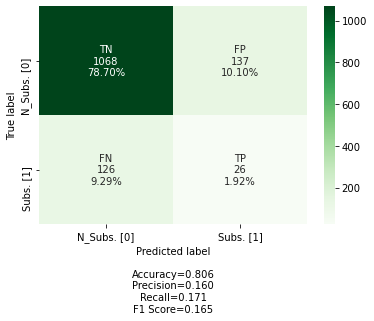

In [36]:
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(test_y, y_pred_df.pred_y)
labels = ["TN","FP","FN","TP"]
categories = ["N_Subs. [0]","Subs. [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

In [37]:
print( metrics.classification_report( test_y, y_pred_df.pred_y ) )

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1205
           1       0.16      0.17      0.17       152

    accuracy                           0.81      1357
   macro avg       0.53      0.53      0.53      1357
weighted avg       0.81      0.81      0.81      1357



## <font color='Blue'>3.6 Finding important features</font></font>

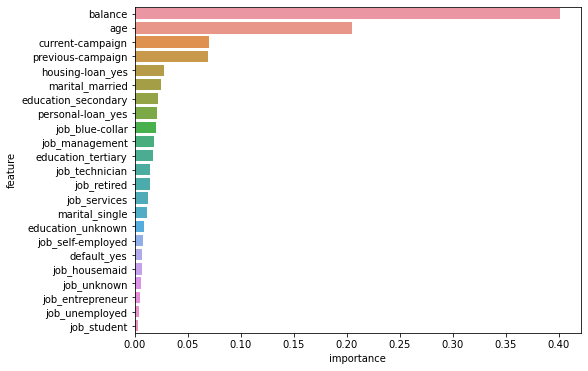

In [38]:
import numpy as np

# Create a dataframe to store the featues and their corresponding importances
feature_rank = pd.DataFrame( { 'feature': train_X.columns, 'importance': gboost_clf.feature_importances_ } )

## Sorting the features based on their importances with most important feature at top
feature_rank = feature_rank.sort_values('importance', ascending = False)
plt.figure(figsize=(8, 6))

# plot the values
sn.barplot( y = 'feature', x = 'importance', data = feature_rank );

## <font color='Blue'>4.0 Stochastic Gradient Boosting</font></font>

    Useful when there is overfitting in gradient boosting
    Here a sub-sample is used in every iteration

## <font color='Blue'>4.1 Executing Stochastic Gradient Boosting</font></font>

    Useful when there is overfitting in gradient boosting
    Here a sub-sample is used in every iteration

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

## Initializing Gradient Boosting with 500 estimators and max depth as 10, subsample < 1.0
## Sub-sample < 1.0 indicates stochastic gradient boosting
sboost_clf = GradientBoostingClassifier( n_estimators=500, max_depth=10, subsample = 0.5)

## Fitting gradient boosting model to training set
sboost_clf.fit(train_X, train_y )

GradientBoostingClassifier(max_depth=10, n_estimators=500, subsample=0.5)

## <font color='Blue'>4.2 Extracting Probabilities</font>

In [40]:
sto_predict = sboost_clf.predict_proba( test_X )
sto_predict = pd.DataFrame(sto_predict)[1]
sto_predict = sto_predict.to_numpy()

In [41]:
# Gathering probabilities
y_pred_df = pd.DataFrame( { "actual": test_y, 
                            "predicted_prob": sto_predict 
                          } )
y_pred_df.sample(10, random_state = 42)
y_pred_df.head(10)

,actual,predicted_prob
2398,0,6.054635e-08
800,0,1.289594e-02
2288,0,1.020981e-05
2344,0,1.272380e-16
3615,0,2.978168e-03
3548,0,2.924596e-06
1115,0,8.767599e-03
4053,0,7.892409e-06
838,0,1.188190e-05
4141,0,8.619085e-04


## <font color='Blue'>4.3 Classifier Performance</font>

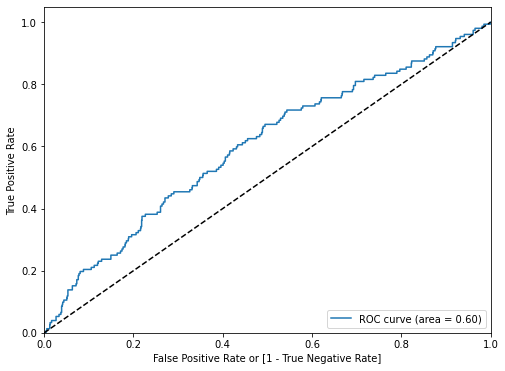

0.5994212710198733

In [42]:
# Plotting AUC 
fpr, tpr, thresholds = draw_roc( test_y, y_pred_df.predicted_prob)

# Measuring Test AUC
metrics.roc_auc_score( test_y, y_pred_df.predicted_prob)

## <font color='Blue'>4.4 Plotting Distributions and Identifying optimal probability</font>

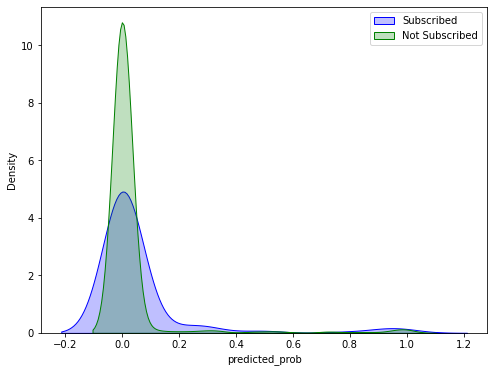

In [43]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Subscribed' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Not Subscribed' )
plt.legend()
plt.show()

## <font color='Blue'>4.5 Confusion Matrix and Performance Measures</font>

In [44]:
y_pred_df['pred_y'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.0020 else 0)

In [45]:
pd.crosstab(test_y, y_pred_df.pred_y,margins=True,colnames=['predicted'],rownames=['actual'],margins_name="Total")

predicted,0,1,Total
actual,,,
0,1009,196,1205
1,114,38,152
Total,1123,234,1357


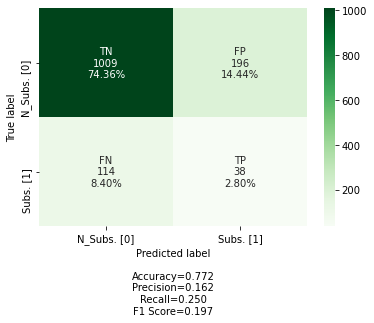

In [46]:
# Confusion matrix
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(test_y, y_pred_df.pred_y)
labels = ["TN","FP","FN","TP"]
categories = ["N_Subs. [0]","Subs. [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

In [47]:
print( metrics.classification_report( test_y, y_pred_df.pred_y ) )

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1205
           1       0.16      0.25      0.20       152

    accuracy                           0.77      1357
   macro avg       0.53      0.54      0.53      1357
weighted avg       0.82      0.77      0.79      1357



## <font color='Blue'>4.6 Finding important features</font></font>

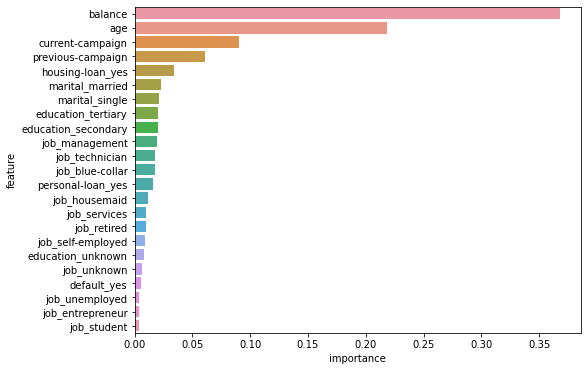

In [48]:
import numpy as np

# Create a dataframe to store the featues and their corresponding importances
feature_rank = pd.DataFrame( { 'feature': train_X.columns, 'importance': sboost_clf.feature_importances_ } )

## Sorting the features based on their importances with most important feature at top
feature_rank = feature_rank.sort_values('importance', ascending = False)
plt.figure(figsize=(8, 6))

# plot the values
sn.barplot( y = 'feature', x = 'importance', data = feature_rank );

## <font color='Blue'>5.0 Bagging</font></font>

## <font color='Blue'>5.1 Executing Bagging</font></font>

In [49]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(n_estimators=500,max_samples=0.8)
bagging_clf.fit(train_X, train_y)

BaggingClassifier(max_samples=0.8, n_estimators=500)

## <font color='Blue'>5.2 Extracting Probabilities</font></font>

In [50]:
bag_predict = bagging_clf.predict_proba( test_X )
bag_predict = pd.DataFrame(bag_predict)[1]
bag_predict = bag_predict.to_numpy()

In [51]:
# Gathering probabilities
y_pred_df = pd.DataFrame( { "actual": test_y, 
                            "predicted_prob": bag_predict 
                          } )
y_pred_df.sample(10, random_state = 42)
y_pred_df.head(10)

,actual,predicted_prob
2398,0,0.222
800,0,0.378
2288,0,0.044
2344,0,0.054
3615,0,0.098
3548,0,0.162
1115,0,0.144
4053,0,0.274
838,0,0.102
4141,0,0.364


## <font color='Blue'>5.3 Classifier Performance</font></font>

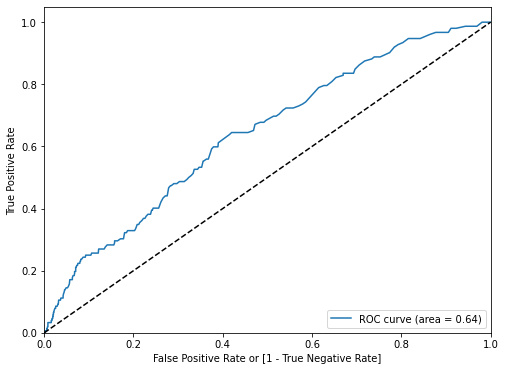

0.6400114653854553

In [52]:
# Plotting AUC 
fpr, tpr, thresholds = draw_roc( test_y, y_pred_df.predicted_prob)

# Measuring Test AUC
metrics.roc_auc_score( test_y, y_pred_df.predicted_prob)

## <font color='Blue'>5.4 Plotting Distributions and Identifying optimal probability</font>

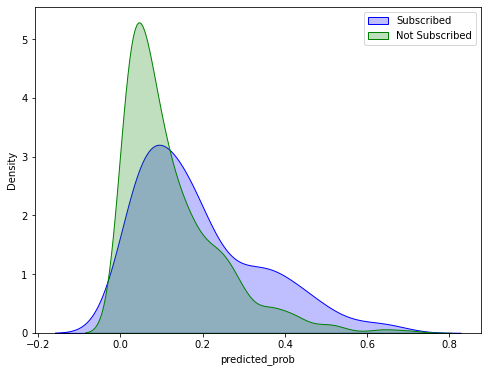

In [53]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Subscribed' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Not Subscribed' )
plt.legend()
plt.show()

## <font color='Blue'>5.5 Confusion Matrix and Performance Measure</font>

In [54]:
y_pred_df['pred_y'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.15 else 0)

In [55]:
pd.crosstab(test_y, y_pred_df.pred_y,margins=True,colnames=['predicted'],rownames=['actual'],margins_name="Total")

predicted,0,1,Total
actual,,,
0,832,373,1205
1,78,74,152
Total,910,447,1357


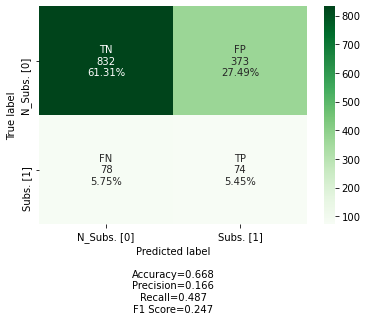

In [56]:
# Confusion matrix
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(test_y, y_pred_df.pred_y)
labels = ["TN","FP","FN","TP"]
categories = ["N_Subs. [0]","Subs. [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

## <font color='Blue'>6.0 Summary of Results</font>
  
    Random Forest    : AUC - 0.652
    ADA Boosting     : AUC - 0.671
    Gradient Boosting: AUC - 0.583
    SGB              : AUC - 0.591
    Bagging          : AUC - 0.640